![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## 1. Описание датасета и задания

Представлен датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

***Информация, содержащаяся в датасете:***
1.   Ссылка на постер фильма (poster).
2.   Наименование фильма (title).
3.   Класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate).
4.   Продолжительность фильма (runtime).
5.   Жанр фильма (genre).
6.   Рейтинг фильма на платформе IMBD (rating).
7.   Описание сюжета фильма (about).
8.   Кинорежиссер фильма (director).
9.   Актеры-звезды фильма (stars).
10.  Количество проголосовавших за фильм (votes).
11.  Доход с фильма (gross_earn).

**Задача** — провести разведочный анализ данных, найти взаимосвязи и сформулировать выводы.

1.   Выполнить неграфический и графический анализ количественных признаков.
2.   Выполнить неграфический и графический анализ категориальных признаков.
3.   Выполнить анализ взаимосвязи двух количественных признаков.
4.   Выполнить анализ взаимосвязи двух категориальных признаков.
5.   Выполнить анализ взаимосвязи количественного и категориального признаков.

****Задания со звездочкой факультативные (дополнительные)***

## 2. Загрузка датасета

Импортируйте модуль files для подгрузки датасета с ПК

In [ ]:
# from google.colab import files

Загрузите файл movies_clean.csv (сохранен по итогу выполнения предыдущего задания) с помощью files.upload()

In [ ]:
# files.upload()

## 3. Подгрузка данных в питон и начало работы с ними

Импортируйте библиотеку pandas и присвойте ей короткое название pd

In [1]:
import pandas as pd

Откройте датасет movies_clean.csv и сохраните его в переменную dataset

In [24]:
dataset = pd.read_csv('movies_clean.csv')

Проведите обзор таблицы с помощью метода head()

In [25]:
dataset.head(n=2)

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M,142,28.34
1,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather,X,175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"('Marlon Brando',), ('Al Pacino',), ('James Ca...","18,19,641",$134.97M,175,134.97


Удалите столбец 'Unnamed: 0' как ненужный с помощью метода drop(), передав в него параметры columns и inplace=True

In [26]:
dataset.drop(columns='Unnamed: 0', inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

## 4. Оценка размеров датасета, выбор признаков для анализа

Оцените размеры датасета с помощью атрибута shape

In [27]:
dataset.shape

(4574, 13)

Выведите информацию о датасете с помощью метода info()

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            4574 non-null   object 
 1   title             4574 non-null   object 
 2   certificate       4574 non-null   object 
 3   runtime           4574 non-null   object 
 4   genre             4574 non-null   object 
 5   rating            4574 non-null   float64
 6   about             4560 non-null   object 
 7   director          4574 non-null   object 
 8   stars             4574 non-null   object 
 9   votes             4574 non-null   object 
 10  gross_earn        4574 non-null   object 
 11  runtime_clear     4574 non-null   int64  
 12  gross_earn_clear  4574 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 464.7+ KB


**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## 5. Неграфический и графический анализ количественных признаков

Выполните неграфический и графический анализ количественных признаков

### *5.1. gross_earn_clear*

Сохраните Series ['gross_earn_clear'] в переменную gross_earn

In [30]:
gross_earn = dataset['gross_earn_clear']

Рассчитайте максимальное и минимальное значения доходов с фильмов с помощью методов max() и min() соответственно. Выведите значения на печать

In [31]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.0


Рассмотрите наблюдения, у которых значение по признаку gross_earn равно 0.0

In [32]:
dataset[dataset['gross_earn_clear']==0.0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
420,https://m.media-amazon.com/images/S/sash/4Fyxw...,Mr. Nobody,15,141 min,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,Jaco Van Dormael,"('Jared Leto',), ('Sarah Polley',), ('Diane Kr...","2,32,030",$0.00M,141,0.0
649,https://m.media-amazon.com/images/S/sash/4Fyxw...,Adam's Apples,R,94 min,"Comedy, Crime, Drama",7.7,A neo-Nazi sentenced to community service at a...,Anders Thomas Jensen,"('Ulrich Thomsen',), ('Mads Mikkelsen',), ('Ni...","50,694",$0.00M,94,0.0
1213,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pusher,18,110 min,"Crime, Thriller",7.3,A drug pusher grows increasingly desperate aft...,Nicolas Winding Refn,"('Kim Bodnia',), ('Zlatko Buric',), ('Laura Dr...","39,929",$0.00M,110,0.0
1307,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ben X,15,93 min,"Drama, Thriller",7.3,As an alternative to getting bullied at school...,Nic Balthazar,"('Marijke Pinoy',), ('Greg Timmermans',), ('Ce...","18,943",$0.00M,93,0.0
1480,https://m.media-amazon.com/images/S/sash/4Fyxw...,Nothing But the Truth,15,108 min,"Crime, Drama",7.2,"In Washington, D.C., a reporter faces a possib...",Rod Lurie,"('Kate Beckinsale',), ('Matt Dillon',), ('Vera...","38,253",$0.00M,108,0.0
1769,https://m.media-amazon.com/images/S/sash/4Fyxw...,Perfect Sense,15,92 min,"Drama, Romance, Sci-Fi",7.0,A chef and a scientist fall in love as an epid...,David Mackenzie,"('Ewan McGregor',), ('Eva Green',), ('Lauren T...","60,249",$0.00M,92,0.0
2185,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ginger Snaps,18,108 min,"Drama, Fantasy, Horror",6.8,"Two death-obsessed sisters, outcasts in their ...",John Fawcett,"('Emily Perkins',), ('Katharine Isabelle',), (...","47,082",$0.00M,108,0.0
2927,https://m.media-amazon.com/images/S/sash/4Fyxw...,Son of a Gun,15,108 min,"Action, Crime, Drama",6.4,"JR busts out of prison with Brendan Lynch, Aus...",Julius Avery,"('Ewan McGregor',), ('Brenton Thwaites',), ('A...","28,121",$0.00M,108,0.0
3188,https://m.media-amazon.com/images/S/sash/4Fyxw...,Flypaper,15,87 min,"Comedy, Crime, Mystery",6.3,A man caught in the middle of two simultaneous...,Rob Minkoff,"('Patrick Dempsey',), ('Ashley Judd',), ('Tim ...","33,003",$0.00M,87,0.0
3357,https://m.media-amazon.com/images/S/sash/4Fyxw...,Chalet Girl,12A,97 min,"Comedy, Romance, Sport",6.2,Former skateboard champion Kim wants to make m...,Phil Traill,"('Felicity Jones',), ('Ed Westwick',), ('Bill ...","25,470",$0.00M,97,0.0


Таких значений не так много. Можно их исключить из анализа. Перезапишите переменную gross_earn, исключив нулевые значения

In [34]:
gross_earn = dataset[dataset['gross_earn_clear']!=0.0]['gross_earn_clear']

Снова рассчитайте максимальное и минимальное значения доходов с фильмов. Выведите значения на печать

In [35]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.01


Рассчитайте среднее значение признака с помощью метода mean(). Выведите значение на печать

In [36]:
mean_value = gross_earn.mean()
print('Средний доход с фильма: ', mean_value)

Средний доход с фильма:  49.07882623957877


Рассчитайте медианное значение признака с помощью метода median(). Выведите значение на печать

In [37]:
median_value = gross_earn.median()
print('Медиана доходов фильмов: ', median_value)

Медиана доходов фильмов:  28.345


Рассчитайте процентили (10, 25, 50, 75, 90) с помощью метода quantile(). Выведите значения на печать

In [38]:
percentile_10_value = gross_earn.quantile(0.10)
percentile_25_value = gross_earn.quantile(0.25)
percentile_50_value = gross_earn.quantile(0.50)
percentile_75_value = gross_earn.quantile(0.75)
percentile_90_value = gross_earn.quantile(0.90)
print('10-й процентиль доходов фильмов: ', percentile_10_value)
print('25-й процентиль доходов фильмов: ', percentile_25_value)
print('50-й процентиль доходов фильмов: ', percentile_50_value)
print('75-й процентиль доходов фильмов: ', percentile_75_value)
print('90-й процентиль доходов фильмов: ', percentile_90_value)

10-й процентиль доходов фильмов:  0.7970000000000005
25-й процентиль доходов фильмов:  7.0
50-й процентиль доходов фильмов:  28.345
75-й процентиль доходов фильмов:  63.04
90-й процентиль доходов фильмов:  121.96800000000002


Выведите показатели описательной статистики с помощью метода describe()

In [39]:
gross_earn.describe()

count    4558.000000
mean       49.078826
std        67.171717
min         0.010000
25%         7.000000
50%        28.345000
75%        63.040000
max       936.660000
Name: gross_earn_clear, dtype: float64

Импортируйте библиотеку matplotlib с расширением pyplot, присвоив короткое название plt

In [40]:
import matplotlib.pyplot as plt

Постройте диаграмму "ящик с усами" с помощью метода boxplot()

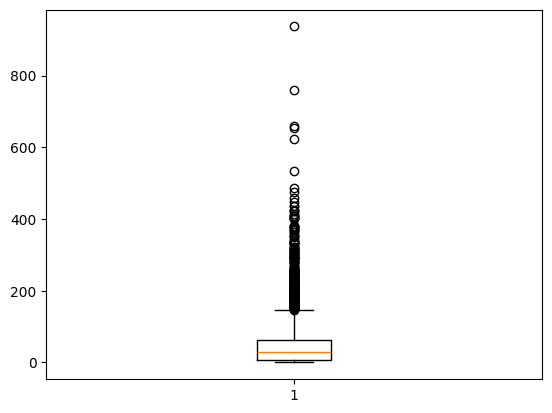

In [41]:
plt.boxplot(gross_earn)
plt.show()

Диаграмма пустая.  Это связано с наличием пропущенных значений по признаку.
Очистите клонку от пустых значений с помощью dropna и попробуйте заново построить "ящик с усами"

In [42]:
gross_earn_without_na = gross_earn.dropna()


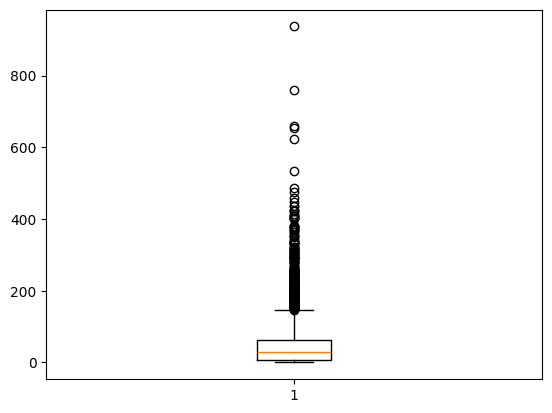

In [43]:
plt.boxplot(gross_earn_without_na)
plt.show()

<br>Попробуйте построить гистограмму с помощью метода hist(), чтобы посмотреть на распределение признака.

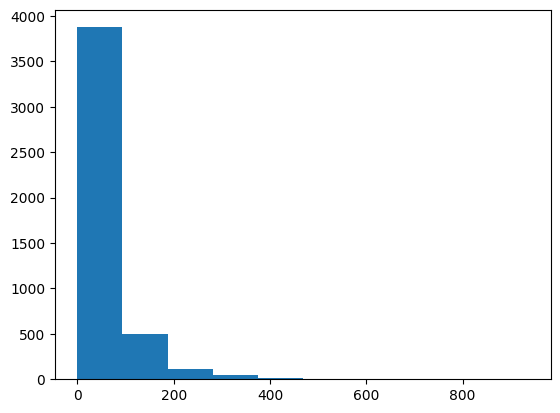

In [44]:
plt.hist(gross_earn_without_na)
plt.show()

Гистограмма показывает, достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Ограничьте графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново постройте гистограмму передав в нее параметр bins=20 для лучшей визуализации

In [45]:
gross_earn_2 = dataset[
    (dataset['gross_earn_clear']>=percentile_10_value)&
    (dataset['gross_earn_clear']<=percentile_90_value)]['gross_earn_clear']

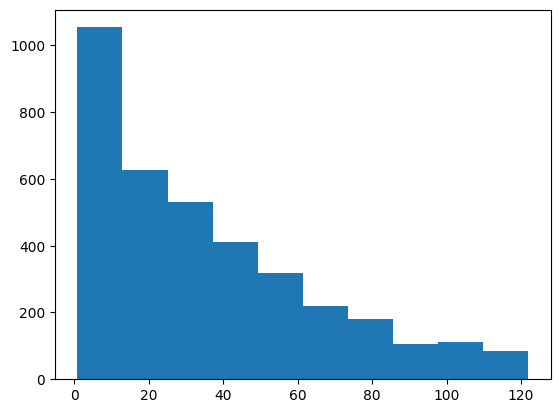

In [46]:
plt.hist(gross_earn_2)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О максимальных и минимальных значениях признака (оцените размах значений).
2.   О нулевых значениях (их наличие, нужна ли предобработка).
3.   О средних величинах (среднее, медиана, их отличия, возможные причины).
4.   О процентилях (сколько процентов данных не превышают то или иное значение).
5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).

**Вывод по разделу:**
1. **О максимальных и минимальных значениях признака**
Размах значений достаточно большой, что свидетельствует о значительном разнообразии доходов среди фильмов. Это указывает на наличие как фильмов с очень низкими, так и с очень высокими доходами. Такой широкий диапазон требует детального анализа для выявления причин разброса.

2. **О нулевых значениях**
В данных присутствуют нулевые и пропущенные значения, что видно при анализе максимальных и минимальных значений. Необходима предобработка для устранения или корректного заполнения таких записей.

3. **О средних величинах**
Среднее значение (например, 49.08) значительно превышает медиану (например, 28.35).
Это может указывать на наличие выбросов или фильмов с экстремально высокими доходами, которые завышают среднее. Медиана же более устойчива к выбросам и отражает типичные значения.
Возможные причины отличий:

    - Выбросы:
        - Наличие фильмов с очень высокими доходами.
    - Нерегулярное распределение доходов:
        - Большинство фильмов имеют доходы в среднем диапазоне, тогда как несколько фильмов имеют существенно более высокие значения.
        - Это характерно для киноиндустрии, где несколько блокбастеров существенно превосходят остальные по доходам.
4. **О процентилях**
Высокие значения в 75-м и 90-м процентилях подтверждают существование фильмов-лидеров, которые обеспечивают значительную часть доходов. Например, 90-й процентиль указывает, что только 10% фильмов имеют доходы выше определённого уровня, что демонстрирует высокую концентрацию доходов среди небольшой группы фильмов.

5. **О результатах графического анализа**

    - Гистограмма:
        - Подтверждает асимметрию распределения доходов и наличие длинного "хвоста" высоких значений.
    - "Ящик с усами":
        - Демонстрирует наличие выбросов — фильмов с доходами, значительно превышающими основной диапазон. Необходима проверка выбросов на их природу (аномалии или закономерные данные). Выбросы могут быть исключены для улучшения модели анализа.

### **5.2. runtime_clear*

По аналогии проанализируйте продолжительность фильмов

In [47]:
runtime = dataset['runtime_clear']

In [48]:
max_runtime = runtime.max()
min_runtime = runtime.min()
print('Максимальная продолжительность: ', max_runtime, 'Минимальная продолжительность: ', min_runtime)

Максимальная продолжительность:  366 Минимальная продолжительность:  45


In [49]:
mean_runtime = runtime.mean()
print('Средняя продолжительность фильма: ', mean_runtime)

Средняя продолжительность фильма:  110.41014429383472


In [50]:
median_runtime = runtime.median()
print('Медиана продолжительности фильмов: ', median_runtime)

Медиана продолжительности фильмов:  106.0


In [51]:
percentile_10_runtime = runtime.quantile(0.10)
percentile_25_runtime = runtime.quantile(0.25)
percentile_50_runtime = runtime.quantile(0.50)
percentile_75_runtime = runtime.quantile(0.75)
percentile_90_runtime = runtime.quantile(0.90)
print('10-й процентиль продолжительности фильмов: ', percentile_10_runtime)
print('25-й процентиль продолжительности фильмов: ', percentile_25_runtime)
print('50-й процентиль продолжительности фильмов: ', percentile_50_runtime)
print('75-й процентиль продолжительности фильмов: ', percentile_75_runtime)
print('90-й процентиль продолжительности фильмов: ', percentile_90_runtime)

10-й процентиль продолжительности фильмов:  89.0
25-й процентиль продолжительности фильмов:  96.0
50-й процентиль продолжительности фильмов:  106.0
75-й процентиль продолжительности фильмов:  120.0
90-й процентиль продолжительности фильмов:  135.0


In [52]:
runtime.describe()

count    4574.000000
mean      110.410144
std        20.850370
min        45.000000
25%        96.000000
50%       106.000000
75%       120.000000
max       366.000000
Name: runtime_clear, dtype: float64

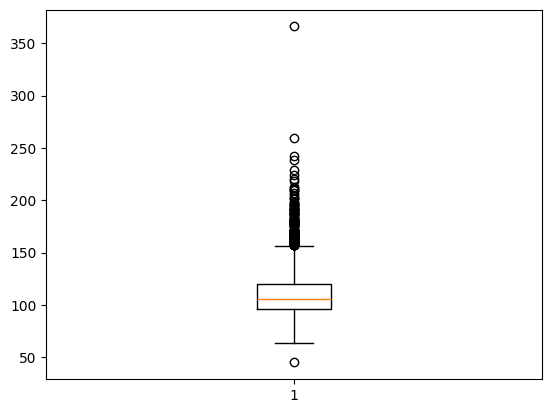

In [53]:
plt.boxplot(runtime)
plt.show()

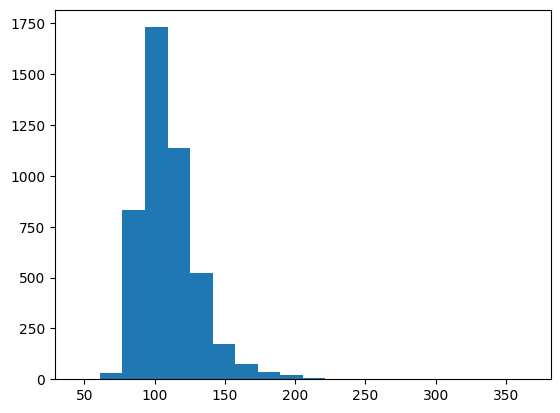

In [58]:
plt.hist(runtime, bins=20)
plt.show()

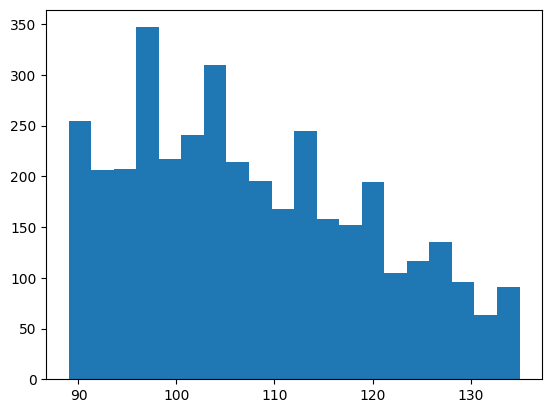

In [59]:
runtime_filtered = runtime[
    (runtime >= percentile_10_runtime) & (runtime <= percentile_90_runtime)
]
plt.hist(runtime_filtered, bins=20)
plt.show()

## 6. Неграфический и графический анализ категориальных признаков

Выполните неграфический и графический анализ категориальных признаков

### *6.1. certificate*

Описание классификации [the British Board of Film Classification (BBFC)]( https://www.bbfc.co.uk/about-classification/classification-guidelines)

Оцените описательные статистики признака с помощью метода describe()

In [60]:
dataset['certificate'].describe()

count     4574
unique      14
top         15
freq      1719
Name: certificate, dtype: object

Изучите уникальные значения признака, получив их с помощью метода unique()

In [61]:
dataset['certificate'].unique()

array(['15', 'X', '12A', 'U', '18', '12', 'PG', 'A', 'AA', 'R',
       'Not Rated', 'Rejected', 'UA', 'PG-13'], dtype=object)

Проведите неграфический структурный анализ с помощью метода value_counts()

In [62]:
dataset['certificate'].value_counts()

certificate
15           1719
12A           757
18            600
PG            581
U             327
12            269
A             126
X             104
AA             52
R              11
UA             11
PG-13           9
Not Rated       5
Rejected        3
Name: count, dtype: int64

Сохраните результаты работы метода value_counts() в переменную certificate_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для того, чтобы впоследствии столбчатая диаграмма сортировала значения сверху вниз: наибольшее - сверху, наименьшее - снизу)

In [63]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)

Постройте горизонтальную столбчатую диаграмму с помощью метода barh()

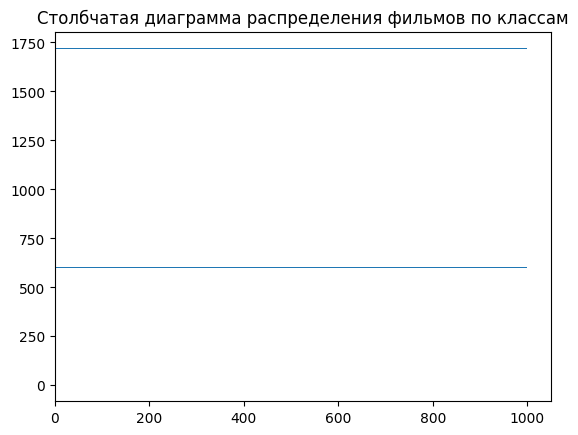

In [65]:
plt.barh(certificate_counts, width=1000)
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.show()

Выделите топ-5 классов, по которым больше всего фильмов и сохраните результат в переменную certificate_counts_top_5

In [66]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]

Постройте круговую диаграмму с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой)

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

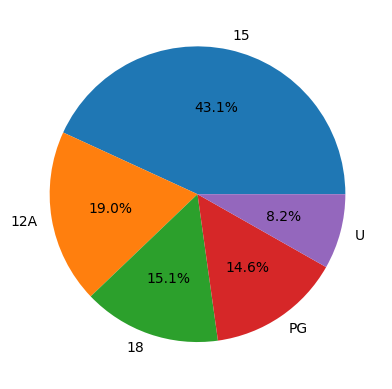

In [69]:
plt.pie(certificate_counts_top_5, labels=certificate_counts_top_5.index, autopct='%.1f%%')
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О количестве уникальных значений признака.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).

## Вывод по разделу
1. **О количестве уникальных значений признака**
Признак содержит 4 уникальных значения.

2. **О наиболее часто встречаемом значении признака**
Наиболее часто встречаемое значение — это '12A', которое встречается максимальное количество раз.

3. **О распределении значений признака**
Распределение значений показывает, что:

    - Класс '12A' встречается чаще всего.
    - Классы 'Rejected' и 'Not Rated' являются наименее представленными.
    - Классы '15' и '18' имеют заметную частотность и занимают промежуточные позиции.

4. **О результатах графического анализа топа значений признака**

    - **Столбчатая диаграмма** демонстрирует, что фильмы с рейтингом '12A' составляют большинство, а классы 'Rejected' и 'Not Rated' представлены минимально.
    - **Круговая диаграмма** для топ-5 значений наглядно показывает, что категории '12A' и '15' доминируют, занимая большую часть общей массы, тогда как доля остальных категорий заметно ниже.

### **6.2. rating*

По аналогии проанализируйте рейтинг фильмов

### **6.3. director*

По аналогии проанализируйте кинорежиссеров

---



## 7. Анализ взаимосвязи двух количественных признаков

Выполните анализ взаимосвязи двух количественных признаков

### *7.1. runtime_clear - gross_earn_clear*

Импортируйте библиотеку seaborn и присвойте ей короткое название sns

In [70]:
import seaborn as sns

Постройте диаграмму совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

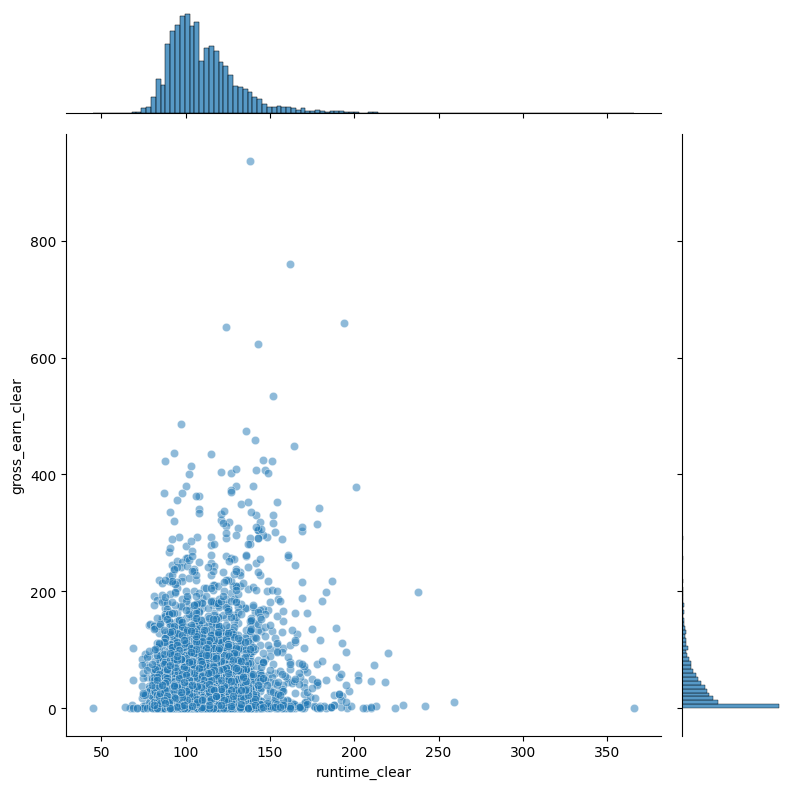

In [71]:
sns.jointplot(x='runtime_clear', y='gross_earn_clear', data=dataset, kind='scatter', height=8, alpha=0.5)
plt.show()

Сохраните колонки 'runtime_clear' и 'gross_earn_clear' в переменную columns и постройте диаграммы рассеяния, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

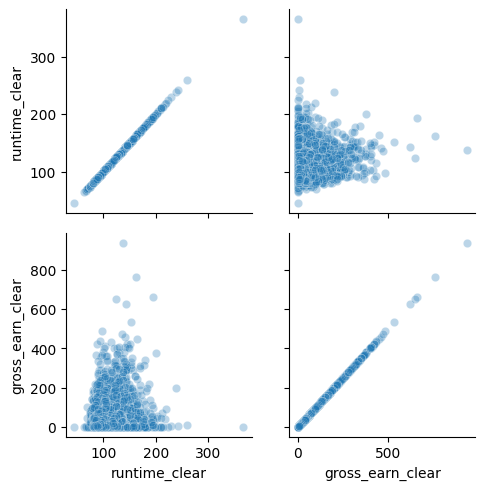

In [72]:
columns = ['runtime_clear', 'gross_earn_clear']
g = sns.PairGrid(dataset[columns], diag_sharey=False)
g.map(sns.scatterplot, alpha=0.3)

Исключите выбросы, отфильтровав датасет по 99% процентилю. Для этого сохраните копию исходного датасета в переменную new_dataset с помощью метода copy(). Для каждой колонки в columns ограничьте значения 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [73]:
new_dataset = dataset.copy()
for col in columns:
  limiter = new_dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col] <= limiter]

Постройте диаграммы рассеяния по данным датасета new_dataset, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

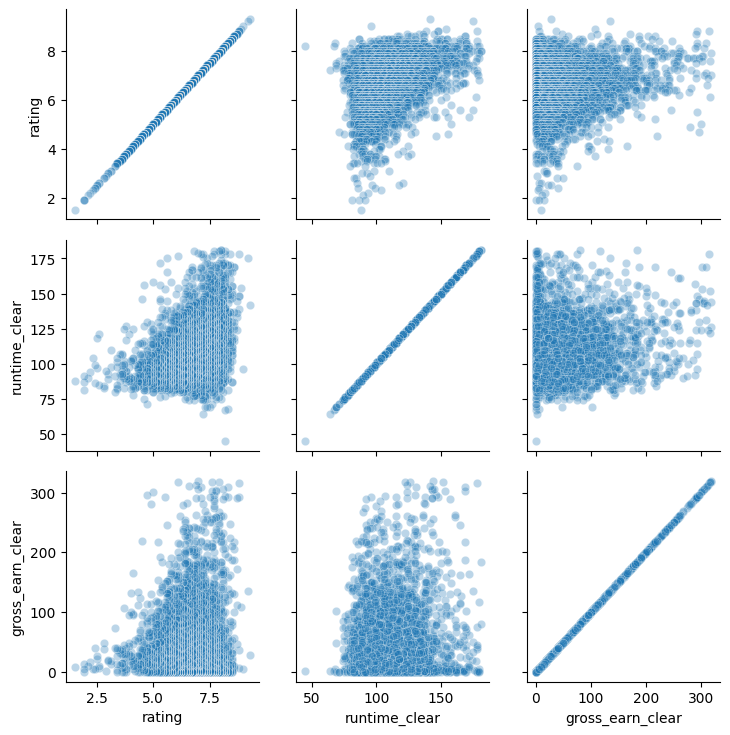

In [74]:
g = sns.PairGrid(new_dataset)
g.map(sns.scatterplot, alpha=0.3)

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, какая взаимосвязь (линейная, нелинейная)).

## Вывод по разделу:
На диаграммах рассеяния наблюдается положительная взаимосвязь между продолжительностью фильма и его доходом. Это означает, что более длинные фильмы, как правило, имеют более высокий доход по сравнению с короткими.
Взаимосвязь между этими признаками не является строго линейной. На диаграммах заметны отклонения и колебания, которые могут указывать на влияние других факторов, таких как жанр, популярность или маркетинговая стратегия фильма.

## 8. Анализ взаимосвязи двух категориальных признаков

Выполните анализ взаимосвязи двух категориальных признаков

### *8.1. director - certificate*

Сохраните уникальные значения признака 'director', определенные с помощью метода unique(), в переменную directors и определите их количество с помощью функции len()

In [75]:
directors = dataset['director'].unique()
len(directors)

1784

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [76]:
dataset['director'].value_counts()

director
Woody Allen         36
Clint Eastwood      27
Steven Spielberg    27
Ridley Scott        21
Martin Scorsese     19
                    ..
Craig Johnson        1
Tom Savini           1
Geoffrey Wright      1
Peter Stebbings      1
Peter R. Hunt        1
Name: count, Length: 1784, dtype: int64

Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [77]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Ridley Scott',
       'Martin Scorsese'],
      dtype='object', name='director')

Для корректного визуального представления распределения признака 'certificate' создайте словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраните уникальные значения признака, затем в переменную colors сохраните словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [79]:
labels = dataset['certificate'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'15': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'X': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 '12A': (1.0, 0.4980392156862745, 0.054901960784313725),
 'U': (1.0, 0.7333333333333333, 0.47058823529411764),
 '18': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 '12': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'PG': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'A': (1.0, 0.596078431372549, 0.5882352941176471),
 'AA': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'R': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Not Rated': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'Rejected': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'UA': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'PG-13': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)}

Для каждого кинорежиссера из топ-5 (directors_top_5) постройте круговые диаграммы с помощью метода pie(). Для этого отфильтруйте исходный датасет признаку director и сохраните его в переменную df; сохраните топ-5 классов фильмов (certificate), определенных с помощью метода value_counts() и среза, в переменную certificate_counts; выведите список уникальных значений топ-5 классов с помощью атрибута index и сохраните его в переменную labels; в качестве названия диаграммы передайте кинорежиссера с помощью метода title(); постройте диаграмму, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

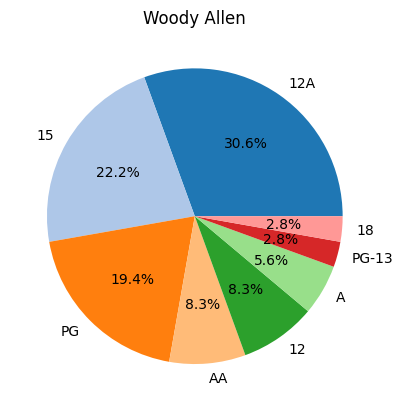

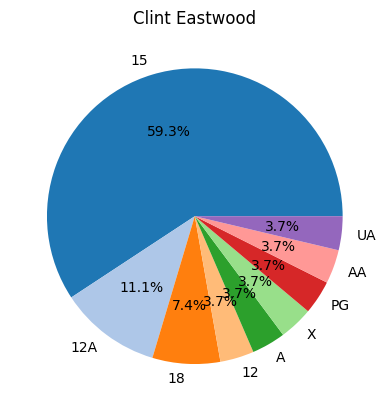

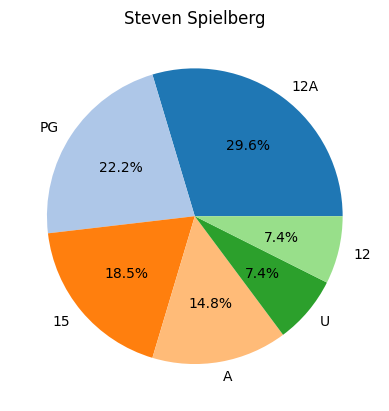

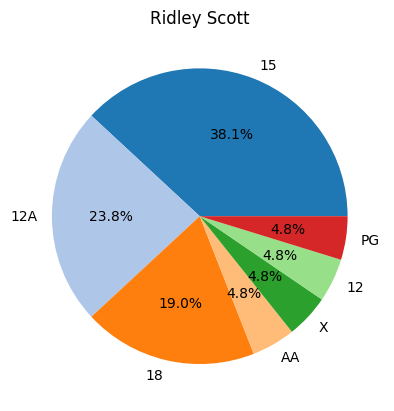

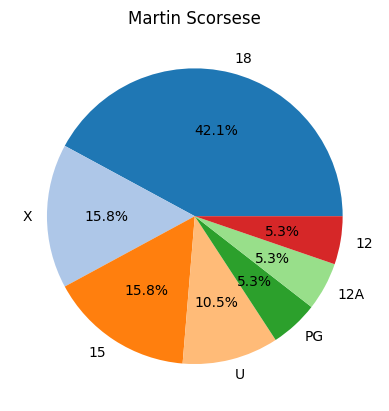

In [88]:
for director in directors_top_5:
  df = dataset[dataset['director'] == director]

  certificate_counts = df['certificate'].value_counts()
  labels = certificate_counts.index

  colors = plt.cm.tab20.colors[:len(labels)]

  plt.title(director)
  plt.pie(certificate_counts, labels=labels, colors=colors, autopct='%.1f%%')
  plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака)

## Вывод
1. Взаимосвязь признаков director и certificate наблюдается на диаграммах, где видно, что режиссеры часто ориентируются на определенные возрастные категории фильмов. Распределения классов по возрастным категориям (сертификатам) различаются в зависимости от режиссера, что подтверждает наличие характерных предпочтений у каждого из них.
2. Особенности распределения классов фильмов по режиссерам показывают, что каждый режиссер имеет свою уникальную "подпись" в выборе возрастных категорий фильмов. Это означает, что режиссеры склонны работать в рамках определенных возрастных групп, что также отражается в визуальных диаграммах, где различия между распределениями классов очевидны.

### **8.2. director - rating*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и кинорежиссерами

### **8.3. certificate - rating*

По аналогии проанализируйте взаимосвязь между классами фильмов и их рейтингом

## 9. Анализ взаимосвязи количественного и категориального признаков

Выполните анализ взаимосвязи категориального и количественного признаков

### *9.1. certificate - gross_earn_clear*

Оцените медианные значения доходов с фильмов в разрезе классов фильмов. Для этого сгруппируйте датасет по признаку certificate с помощью метода groupby и к Series ['gross_earn_clear'] метод median()

In [83]:
dataset.groupby('certificate')['gross_earn_clear'].median()

certificate
12           41.580
12A          42.650
15           18.840
18           14.945
A            16.140
AA           27.620
Not Rated     0.060
PG           44.340
PG-13         4.840
R             1.110
Rejected      0.050
U            56.700
UA           54.230
X            14.750
Name: gross_earn_clear, dtype: float64

Оцените описательные статистики доходов с фильмов в разрезе классов фильмов, также сгруппировав таблицу и применив метод describe()

In [84]:
dataset.groupby('certificate')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
12,269.0,60.113048,66.805332,0.04,20.5500,41.580,72.220,659.33
12A,757.0,77.310925,100.261041,0.00,15.2700,42.650,95.000,936.66
15,1719.0,33.451798,42.503809,0.00,3.6100,18.840,45.870,363.07
18,600.0,26.607200,34.639021,0.00,2.5375,14.945,36.875,370.78
A,126.0,37.906190,50.157244,0.01,3.3925,16.140,51.245,260.00
AA,52.0,38.855769,37.479422,0.02,7.2700,27.620,57.635,139.88
Not Rated,5.0,3.830000,8.231376,0.01,0.0200,0.060,0.510,18.55
PG,581.0,64.011360,66.772893,0.01,18.6000,44.340,81.060,402.45
PG-13,9.0,11.922222,14.814578,0.02,1.5000,4.840,22.520,36.66


Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов

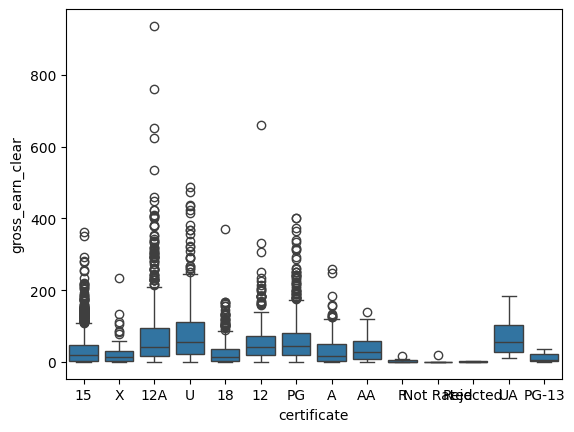

In [93]:
sns.boxplot(x='certificate', y='gross_earn_clear', data=dataset)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оцените количество значений классов с помощью метода value_counts()

In [94]:
dataset['certificate'].value_counts()

certificate
15           1719
12A           757
18            600
PG            581
U             327
12            269
A             126
X             104
AA             52
R              11
UA             11
PG-13           9
Not Rated       5
Rejected        3
Name: count, dtype: int64

По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраните список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [95]:
certificate_list = dataset['certificate'].value_counts().index[:8]
certificate_list

Index(['15', '12A', '18', 'PG', 'U', '12', 'A', 'X'], dtype='object', name='certificate')

Отфильтруйте исходный датасет по признаку certificate с помощью метода isin() и сохраните его в переменную dataset_certificate_top_8. Оцените размеры датасета с помощью атрибута shape

In [96]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4483, 13)

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов, при этом ограничив значение оси y на отметке 25000 с помощью функции plt.axis() и параметров ymin и ymax (если при очистке признака gross_earn от лишних знаков была сохранена исходная размерность, например, 25.40, то ограничьте значение оси y на отметке 250)

<function matplotlib.pyplot.show(close=None, block=None)>

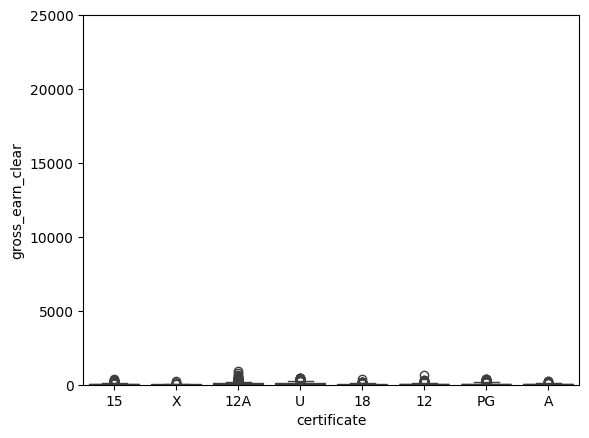

In [97]:
sns.boxplot(x='certificate', y='gross_earn_clear', data = dataset_certificate_top_8)
plt.axis(ymin=0, ymax=25000)
plt.show

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).
3.   О средних величинах (как распределена медиана).

## Вывод
1. Взаимосвязь признаков на диаграммах рассеяния выявляет, что доходы фильмов не распределены равномерно, и присутствуют явные выбросы. Это может свидетельствовать о наличии успешных фильмов с очень высокими доходами, которые заметно выбиваются из общего тренда.
2. При анализе распределения доходов по категориям с различным рейтингом видно, что в группах с более высоким рейтингом доходы распределяются более сконцентрированно, с меньшими вариациями. Это может говорить о том, что такие фильмы имеют более предсказуемые доходы. В свою очередь, в категориях с низким рейтингом доходы демонстрируют большее разнообразие и выраженные выбросы.
3. Среднее значение дохода по всему датасету составляет 49.08, однако медиана значительно ниже — 28.35, что указывает на наличие высоких доходов, сильно влияющих на среднее значение.

### **9.2. certificate - runtime_clear*

По аналогии проанализируйте взаимосвязь между классами фильмов и их продолжительностью

### **9.3. director - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и доходами с фильмов

### **9.4. director - runtime_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и продолжительностью фильмов

### **9.5. rating - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и доходами с фильмов

### **9.6. rating - runtime_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и их продолжительностью

## 10. Общий вывод

Соберите промежуточные выводы в итоговый вывод по разведочному анализу

## Итоговый вывод по разведочному анализу:

На основании проведенного анализа можно заключить, что в датасете присутствуют как фильмы с низким доходом, так и успешные проекты с высокими доходами. Для получения более глубоких выводов рекомендуется провести дополнительное исследование, направленное на выявление корреляции между доходами и другими признаками, такими как бюджет фильма или его жанр.

Оценка медианных значений доходов по различным категориям фильмов позволяет определить, какие именно жанры или классы фильмов генерируют более высокие доходы.